ANALISA DATA TWEET

Import Libraries

In [1]:
import pandas as pd # library untuk data manipulation
import seaborn as sns # library untuk visualisasi 3D
import matplotlib.pyplot as plt # library untuk visualisasi 2D
import sqlite3
import re
import numpy as np # Library untuk membandingkan variable


IMPORT DATA UNTUK ANALISA

In [2]:
#Membaca data tweet

df = pd.read_csv('data.csv', encoding='latin-1')

In [3]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [4]:
#Cek kolom data tweet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


Cek Missing Value dan Duplicated pada data tweet

In [5]:
#Cek Missing Values Data Tweet
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [6]:
#Cek Duplicated Data Tweet
print('Masih ada {} duplicated data'.format(df.duplicated().sum()))

Masih ada 125 duplicated data


In [7]:
#Membersihkan Duplicate Data Tweet
df = df.drop_duplicates()
print('Masih ada {} duplicated data'.format(df.duplicated().sum()))
print('Duplicated data sudah di hapus')

Masih ada 0 duplicated data
Duplicated data sudah di hapus


In [8]:
#Cek data tweet yang dsudah dibersihkan

df.shape

(13044, 13)

Text Processing untuk Cleaning data Tweet dan Replace Kata Alay ke Kata Normal

In [9]:
# Mengubah kata ke huruf kecil

def lowercase(s):
    return s.lower()


In [10]:
#Menghapus tanda baca

def punctuation(s):
    s = re.sub('[^0-9a-zA-Z]+', ' ', s) #menghilangkan semua karakter yang bukan huruf atau angka dan menggantinya dengan spasi.
    s = re.sub('^rt',' ', s) #menghapus awalan rt
    s = re.sub('gue','saya', s) # Mengganti kata "gue" dengan kata "saya"
    s = re.sub(r'\d+', '', s) #menghapus semua angka
    s = re.sub('user',' ', s) #menghapus kata 'user'
    s = re.sub(r':', ' ', s) #menggantikan karakter : dengan spasi
    s = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ', s) #menghapus semua URL 
    s = re.sub(' +', ' ', s) #menggantikan satu atau lebih spasi berturut-turut dengan satu spasi 
    s = re.sub('\n',' ',s) #menggantikan karakter newline (\n) dengan spasi 
    s = re.sub(r'pic.twitter.com.[\w]+', ' ', s) #menghapus semua tautan Twitter (pic.twitter.com)
    return s

In [11]:
#Mengambil Kembali kamusalay

db = sqlite3.connect('database_alay.db', check_same_thread = False)
q_kamusalay = 'SELECT * FROM kamusalay'
t_kamusalay = pd.read_sql_query(q_kamusalay, db)

In [12]:
# Fungsi Replace Kata Alay ke Kata Normal

alay_dict = dict(zip(t_kamusalay['alay'], t_kamusalay['normal']))
def alay_to_normal(s):
    for word in alay_dict:
        return ' '.join([alay_dict[word] if word in alay_dict else word for word in s.split(' ')])

In [13]:
#Membuat Fungsi Text Cleansing

def cleansing(s):
    s = lowercase(s)
    s = punctuation(s)
    s = alay_to_normal(s)
    return s

In [14]:
#Membersihkan Data Tweet

df['Tweet'] = df['Tweet'].apply(cleansing)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku berpikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0


DATA PREPARATION

In [15]:
#Cek Shape data hatespeech dari data uji
df.HS.value_counts()

0    7526
1    5518
Name: HS, dtype: int64

In [16]:
#Menjumlahkan kolom jenis Hatespeech

selected_cols = ['HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other']
total = df[selected_cols].sum()
sorted_total = total.sort_values(ascending=False)
print(sorted_total)


HS_Other         3706
HS_Individual    3540
HS_Group         1978
HS_Religion       789
HS_Race           563
HS_Physical       322
HS_Gender         304
dtype: int64


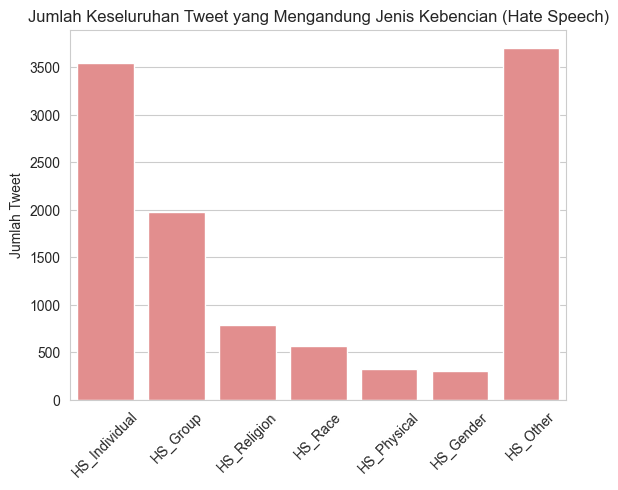

In [17]:
#Visualiasasi Tweet Hatespeech

sns.set_style('whitegrid')
sns.barplot(x=total.index, y=total.values, color='lightcoral')
plt.xticks(rotation=45)
plt.title('Jumlah Keseluruhan Tweet yang Mengandung Jenis Kebencian (Hate Speech)')
plt.ylabel('Jumlah Tweet')
plt.show()

In [18]:
#Cek Shape data abusive dari data uji
df.Abusive.value_counts()

0    8039
1    5005
Name: Abusive, dtype: int64

Memberi label pada kalimat data tweet

In [19]:
# Menambhakan kolom Label pada kalimat data tweet

import numpy as np

df['Label'] = np.where((df['HS'] == 0) & (df['Abusive'] == 0), 'Netral', 
                             np.where((df['HS'] == 1) & (df['Abusive'] == 0), 'Hatespeech',
                                      np.where((df['HS'] == 0) & (df['Abusive'] == 1), 'Abusive', 'Toxic')
                                              )
                                     )

print(df['Label'].unique())


['Toxic' 'Abusive' 'Netral' 'Hatespeech']


In [20]:
df.Label.value_counts()

Netral        5783
Toxic         3262
Hatespeech    2256
Abusive       1743
Name: Label, dtype: int64

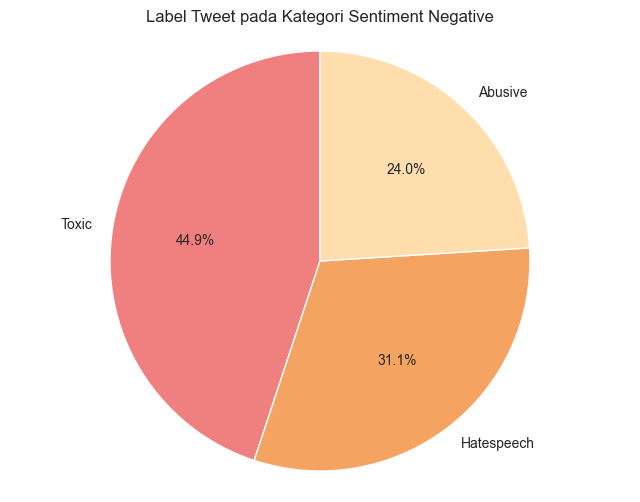

In [21]:
# Visualisasi label data tweet

# Hitung jumlah tweet untuk setiap kategori label
counts = df['Label'].value_counts()

# Hapus label "Netral"
counts = counts.drop("Netral")

# Buat visualisasi menggunakan Matplotlib
plt.figure(figsize=(8,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'sandybrown', 'navajowhite'] )
plt.title('Label Tweet pada Kategori Sentiment Negative')
plt.axis('equal')
plt.show()

In [22]:
#Memberi Label Sentiment pada data tweet

df['Sentiment'] = df['Label'].apply(lambda x: 'Positive' if x == 'Netral' else 'Negative')


In [23]:
df.Sentiment.value_counts()

Negative    7261
Positive    5783
Name: Sentiment, dtype: int64

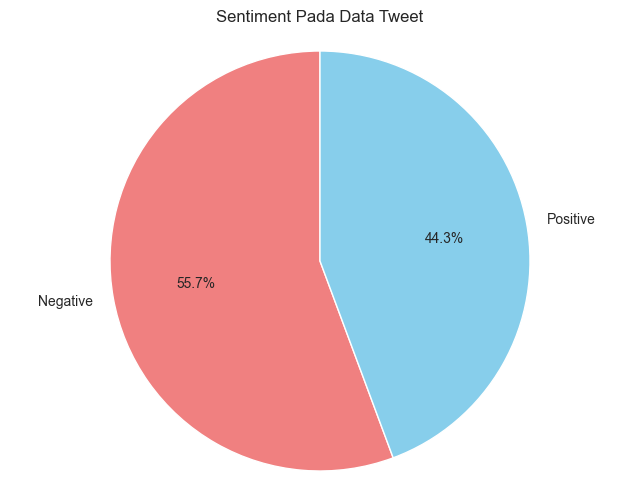

In [24]:
# Hitung jumlah tweet untuk setiap kategori sentiment
counts = df['Sentiment'].value_counts()

# Buat diagram lingkaran menggunakan Matplotlib
plt.figure(figsize=(8,6))
plt.title('Sentiment Pada Data Tweet')
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.axis('equal')
plt.show()

In [25]:
#Membuat Kolom Total Karakter

df['total_char'] = df['Tweet'].apply(len)

df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Label,Sentiment,total_char
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Toxic,Negative,137
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,Negative,110
2,kadang aku berpikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,Netral,Positive,249
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,Netral,Positive,68
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,Toxic,Negative,78


In [26]:
#Membuat Kolom Total Kata

df['total_kata'] = df['Tweet'].apply(lambda word: len(word.split()))

# Cek data tweet baru

df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Label,Sentiment,total_char,total_kata
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Toxic,Negative,137,22
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,Negative,110,19
2,kadang aku berpikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,Netral,Positive,249,38
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,Netral,Positive,68,14
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,Toxic,Negative,78,12


EDA 

In [27]:
# Mencari nilai Mean, Median dan Mode pada Total Karakter

print('Total Karakter')
print('\t')
print('Mean: {}'.format(df['total_char'].mean()))
print('Median: {}'.format(df['total_char'].median()))
print('Mode: {}'.format(df['total_char'].mode()[0]))

Total Karakter
	
Mean: 113.86399877338239
Median: 99.0
Mode: 72


In [28]:
# Mencari nilai Mean, Median dan Mode pada Total Kata

print('Total Kata')
print('Mean: {}'.format(df['total_kata'].mean()))
print('Median: {}'.format(df['total_kata'].median()))
print('Mode: {}'.format(df['total_kata'].mode()[0]))

Total Kata
Mean: 17.95239190432383
Median: 16.0
Mode: 11


In [29]:
# Mencari Perbedaan antara nilai terbesar dan terkecil Total Karakter dan Total Kata

range_total_kata = df.total_kata.max() - df.total_kata.min()
print('Range Total Kata:', range_total_kata)
print('\t')
range_total_char = df.total_char.max() - df.total_char.min()
print('Range Total Karakter:', range_total_char)


Range Total Kata: 122
	
Range Total Karakter: 482


In [30]:
# Quartile dan Interquartile Range Total Karakter

print("Quartile dan Interquartile Range Total Karakter")
print('\t')

p0 = df.total_char.min() # cari nilai minimum
p100 = df.total_char.max() # cari nilai maksimum

q1 = df.total_char.quantile(0.25) # Q1
q2 = df.total_char.quantile(0.50) # Q2
q3 = df.total_char.quantile(0.75) # Q3

iqr = q3-q1 # cari iqr

lower_limit = q1-1.5*iqr # cari batas bawah
upper_limit = q3+1.5*iqr # cari batas atas

print("Batas Bawah 'total_char':", lower_limit)
print("Nilai minimun:", p0)

if lower_limit < p0:
    print("Tidak ada outlier dari sisi batas bawah")
else:
    print("Ada outlier dari sisi batas bawah")


print()
print("Batas Atas 'total_char':", upper_limit)
print("Nilai maksimum:", p100)

if lower_limit > p100:
    print("Tidak ada outlier dari sisi batas atas")
else:
    print("Ada outlier dari sisi batas atas")

Quartile dan Interquartile Range Total Karakter
	
Batas Bawah 'total_char': -91.5
Nilai minimun: 1
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_char': 304.5
Nilai maksimum: 483
Ada outlier dari sisi batas atas


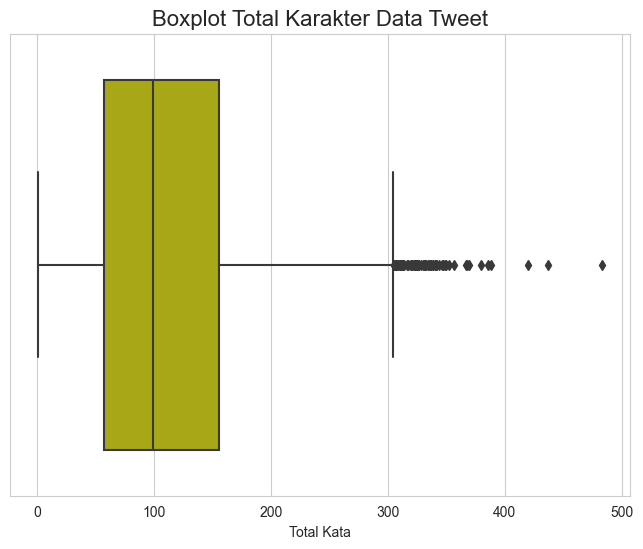

In [31]:
# Visualisasi Total_Karakter

sns.set_palette("colorblind")

fig = plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='total_char', color='y', orient='h')
plt.title('Boxplot Total Karakter Data Tweet', size=14, fontsize=16)
plt.xlabel('Total Kata')
plt.show()


In [32]:
# Quartile dan Interquartile Range Total Kata

print("Quartile dan Interquartile Range Total Kata")
print('\t')

# mencari outlier pada total kata
p0 = df.total_kata.min() # cari nilai minimum
p100 = df.total_kata.max() # cari nilai maksimum

q1 = df.total_kata.quantile(0.25) # Q1
q2 = df.total_kata.quantile(0.50) # Q2
q3 = df.total_kata.quantile(0.75) # Q3

iqr = q3-q1 # cari iqr

lower_limit = q1-1.5*iqr # cari batas bawah
upper_limit = q3+1.5*iqr # cari batas atas

print("Batas Bawah 'total_kata':", lower_limit)
print("Nilai minimum:", p0)

if lower_limit < p0:
    print("Terdapat outlier dari sisi batas bawah")
else:
    print("Tidak terdapat outlier dari sisi batas bawah")

print()
print("Batas Atas 'total_kata':", upper_limit)
print("Nilai maksimum:", p100)

if upper_limit > p100:
    print("Terdapat outlier dari sisi batas atas")
else:
    print("Tidak terdapat outlier dari sisi batas atas")

Quartile dan Interquartile Range Total Kata
	
Batas Bawah 'total_kata': -15.0
Nilai minimum: 0
Terdapat outlier dari sisi batas bawah

Batas Atas 'total_kata': 49.0
Nilai maksimum: 122
Tidak terdapat outlier dari sisi batas atas


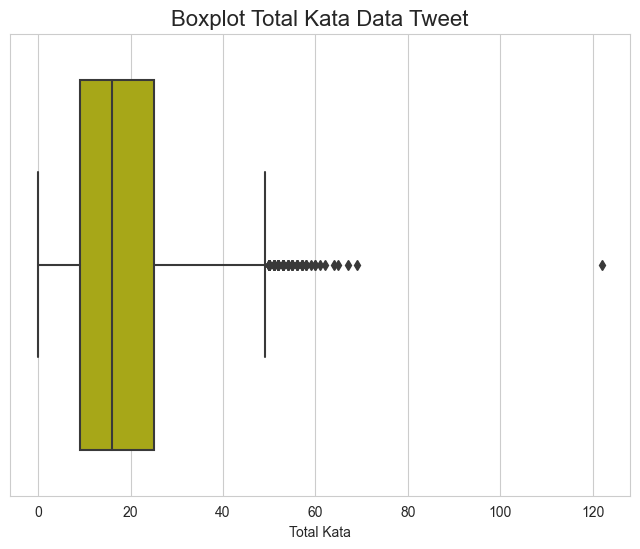

In [33]:
#Visualisasi Total Karakter

sns.set_palette("colorblind")

fig = plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='total_kata', color='y', orient='h')
plt.title('Boxplot Total Kata Data Tweet', size=14, fontsize=16)
plt.xlabel('Total Kata')
plt.show()

In [34]:
# Mengukur Jarak suatu Data dengan Variance

print('Variance Total Kata:', df['total_kata'].var())
print('\t')
print('Variance Total Karakter:', df['total_char'].var())

Variance Total Kata: 129.71137279556734
	
Variance Total Karakter: 5175.352352512764


In [35]:
# Mengukur Banyaknya Data dengan Standard Deviation

print('Standard Deviation Total Kata:', df['total_kata'].std())
print('\t')
print('Standard Deviation Total Karakter:', df['total_char'].std())

Standard Deviation Total Kata: 11.389090077594757
	
Standard Deviation Total Karakter: 71.93992182726336


In [36]:
# Mengukur Berdasarkan skewness

print('Skewness Total Kata:', df['total_kata'].skew())
print('\t')
print('Skewness Total Karakter:', df['total_char'].skew())

Skewness Total Kata: 0.8495961640671554
	
Skewness Total Karakter: 0.7518006116663638


In [37]:
# Cek Normalisasi data dengan Kurtosis

print('Kurtosis Total Kata:', df['total_kata'].kurtosis())
print('\t')
print('Kurtosis Total Karakter:', df['total_char'].kurtosis())


Kurtosis Total Kata: 0.5060995605534742
	
Kurtosis Total Karakter: -0.15215203383397613


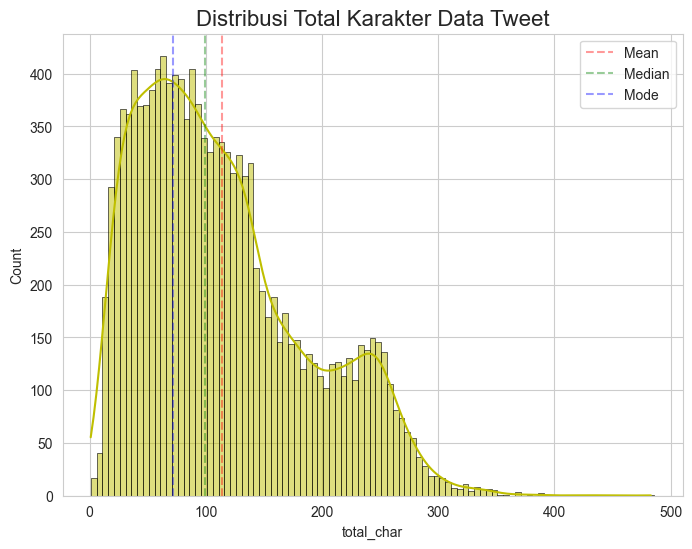

In [38]:
#Visualisasi distribusi karakter pada data Tweet

sns.set_palette("colorblind") #memilih tema warna pada seaborn

fig = plt.figure(figsize=(8,6))

sns.histplot(data=df, x='total_char', color='y', edgecolor='Black', kde=True, binwidth=5)
plt.axvline(x=df['total_char'].mean(), ls='--', color='r', alpha=0.4, label='Mean')
plt.axvline(x=df['total_char'].median(), ls='--', color='g', alpha=0.4, label='Median')
plt.axvline(x=df['total_char'].mode()[0], ls='--', color='b', alpha=0.4, label='Mode')
plt.title('Distribusi Total Karakter Data Tweet', size=14, fontsize=16)
plt.legend()
plt.show()

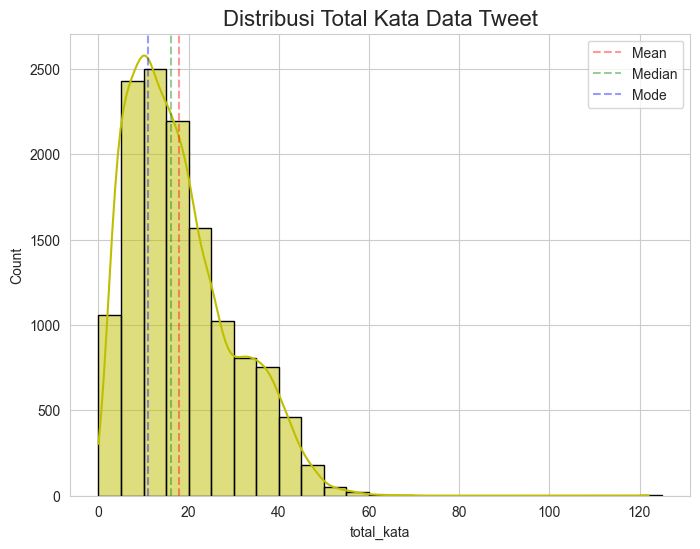

In [39]:
#Visualisasi distribusi kata pada data Tweet

sns.set_palette("colorblind") #memilih tema warna pada seaborn

fig = plt.figure(figsize=(8,6))

sns.histplot(data=df, x='total_kata', color='y', edgecolor='Black', kde=True, binwidth=5)
plt.axvline(x=df['total_kata'].mean(), ls='--', color='r', alpha=0.4, label='Mean')
plt.axvline(x=df['total_kata'].median(), ls='--', color='g', alpha=0.4, label='Median')
plt.axvline(x=df['total_kata'].mode()[0], ls='--', color='b', alpha=0.4, label='Mode')
plt.title('Distribusi Total Kata Data Tweet', size=14, fontsize=16)
plt.legend()
plt.show()

In [40]:
# Mengukur Kolerasi yang Linear

df[['total_kata', 'total_char']].corr()

,total_kata,total_char
total_kata,1.000000,0.968672
total_char,0.968672,1.000000


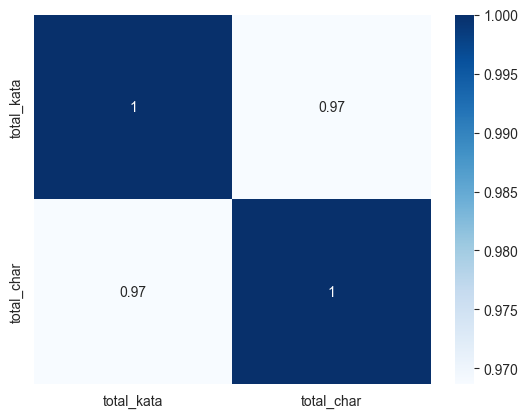

In [41]:
import seaborn as sns

sns.set_palette("colorblind")

# Menghitung matriks korelasi antara kolom 'total_kata' dan 'total_char'
corr_matrix = df[['total_kata', 'total_char']].corr()

# Membuat heatmap dari matriks korelasi
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# Menampilkan plot
plt.show()


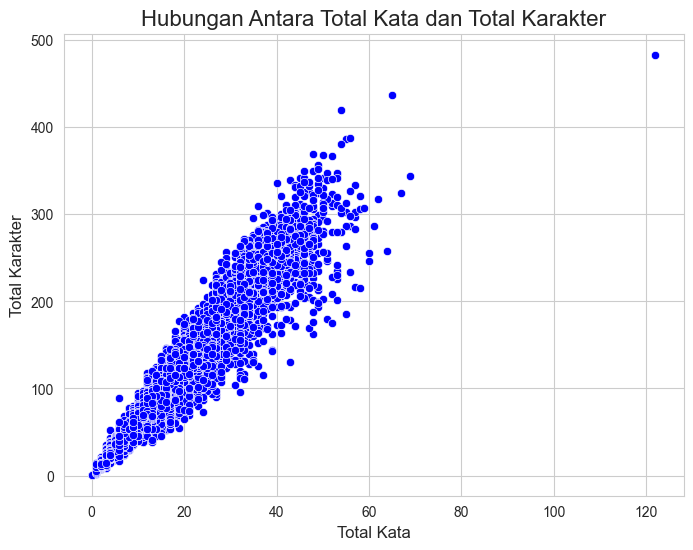

In [42]:
# Visualisasi Korelasi Linear

fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(ax=ax, x='total_kata', y='total_char', data=df, color='b')

plt.title('Hubungan Antara Total Kata dan Total Karakter', size=14, fontsize=16)
plt.xlabel('Total Kata', fontsize=12)
plt.ylabel('Total Karakter', fontsize=12)
plt.show()

Kesimpulan

In [43]:
# EDA Total Karakter

print("EDA Total Karakter Pada Tweet")

# Menghitung statistik deskriptif dari kolom total_char
mean = df['total_char'].mean()
median = df['total_char'].median()
mode = df['total_char'].mode()[0]
variance = np.var(df['total_char'])
std_deviation = np.std(df['total_char'])
skewness = df['total_char'].skew()
kurtosis = df['total_char'].kurt()

# Menampilkan informasi statistik deskriptif
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


EDA Total Karakter Pada Tweet
Mean: 113.86
Median: 99.00
Mode: 72.00
Variance: 5174.96
Standard Deviation: 71.94
Skewness: 0.75
Kurtosis: -0.15


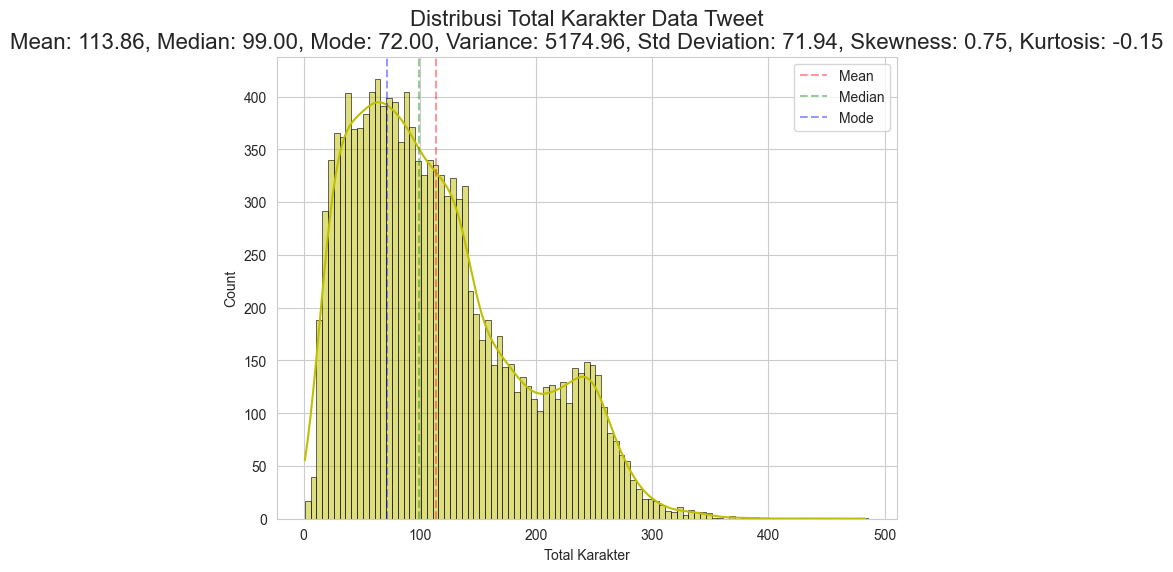

In [44]:
# Visualisasi EDA Total Karakter

fig = plt.figure(figsize=(8,6))
sns.histplot(data=df, x='total_char', color='y', edgecolor='Black', kde=True, binwidth=5)
plt.axvline(x=mean, ls='--', color='r', alpha=0.4, label='Mean')
plt.axvline(x=median, ls='--', color='g', alpha=0.4, label='Median')
plt.axvline(x=mode, ls='--', color='b', alpha=0.4, label='Mode')
plt.title(f'Distribusi Total Karakter Data Tweet\nMean: {mean:.2f}, Median: {median:.2f}, Mode: {mode:.2f}, Variance: {variance:.2f}, Std Deviation: {std_deviation:.2f}, Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}', size=14, fontsize=16)
plt.xlabel('Total Karakter')
plt.legend()
plt.show()

In [45]:
# EDA Total Kata

print("EDA Total Kata Pada Tweet")

# Menghitung statistik deskriptif dari kolom total_kata
mean = df['total_kata'].mean()
median = df['total_kata'].median()
mode = df['total_kata'].mode()[0]
variance = np.var(df['total_kata'])
std_deviation = np.std(df['total_kata'])
skewness = df['total_kata'].skew()
kurtosis = df['total_kata'].kurt()

# Menampilkan informasi statistik deskriptif
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


EDA Total Kata Pada Tweet
Mean: 17.95
Median: 16.00
Mode: 11.00
Variance: 129.70
Standard Deviation: 11.39
Skewness: 0.85
Kurtosis: 0.51


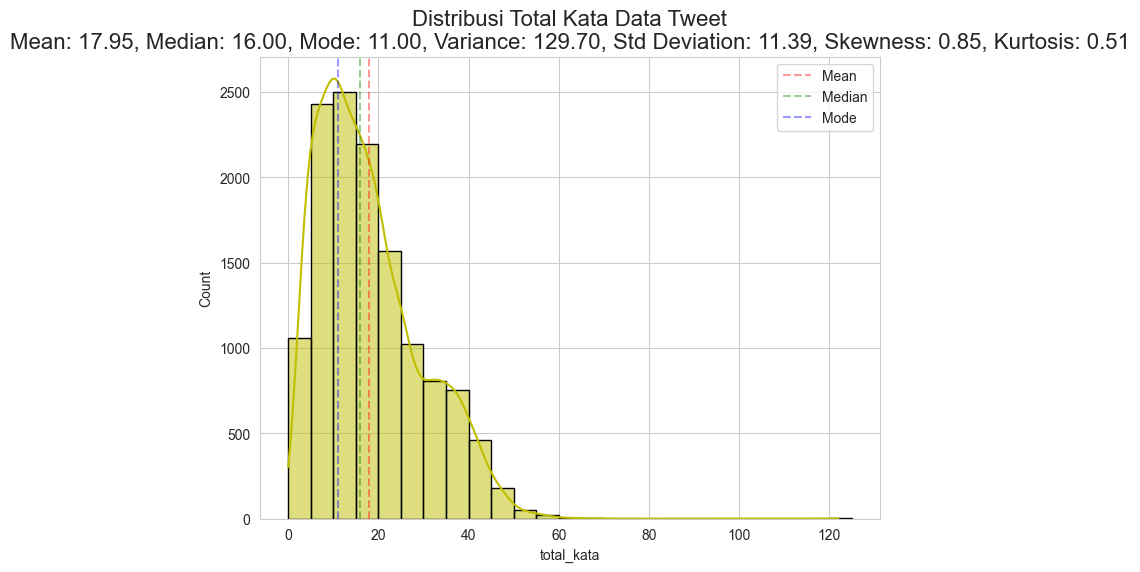

In [46]:
#Visualisasi Total Kata

sns.set_palette("colorblind")

# Menghitung statistik deskriptif dari kolom total_kata
mean = df['total_kata'].mean()
median = df['total_kata'].median()
mode = df['total_kata'].mode()[0]
variance = np.var(df['total_kata'])
std_deviation = np.std(df['total_kata'])
skewness = df['total_kata'].skew()
kurtosis = df['total_kata'].kurt()

# Membuat plot histogram
fig = plt.figure(figsize=(8,6))
sns.histplot(data=df, x='total_kata', color='y', edgecolor='Black', kde=True, binwidth=5)
plt.axvline(x=mean, ls='--', color='r', alpha=0.4, label='Mean')
plt.axvline(x=median, ls='--', color='g', alpha=0.4, label='Median')
plt.axvline(x=mode, ls='--', color='b', alpha=0.4, label='Mode')
plt.title(f'Distribusi Total Kata Data Tweet\nMean: {mean:.2f}, Median: {median:.2f}, Mode: {mode:.2f}, Variance: {variance:.2f}, Std Deviation: {std_deviation:.2f}, Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}', size=14, fontsize=16)
plt.legend()
plt.show()

In [47]:
///
Preparation Data
Data Tweet memiliki 13169 Baris dan 13 kolom

Tidak ada data yang Missing Values
Terdapat 125 Duplicated data

setelah data duplicated dihapus jumlah data menjadi 13044 baris

Jumlah tweet Hatespeech yaitu 5518

dengan urutan HS terbanyak yaitu

HS_Other         3706
HS_Individual    3540
HS_Group         1978
HS_Religion       789
HS_Race           563
HS_Physical       322
HS_Gender         304

Jumlah data yang mengandung kata abusive yaitu 5005

sentimen pada tweet dibagi menjadi dua

Negative    7261
Positive    5783

Setelah data diberi label data di bagi menjadi

Netral        5783
Toxic         3262
Hatespeech    2256
Abusive       1743

EDA

Total Karakter
	
Mean: 113.86399877338239
Median: 99.0
Mode: 72
Range Total Karakter: 482

Quartile dan Interquartile Range Total Karakter
	
Batas Bawah 'total_char': -91.5
Nilai minimun: 1
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_char': 304.5
Nilai maksimum: 483
Ada outlier dari sisi batas atas #outlier adalah nilai data yang melebihi batas tertentu suatu variabel/kolom

Variance #mengukur seberapa jauh jarak data tersebar dari mean-nya
Total Karakter: 5175.352352512764 #Nilai Variance lebih besar dari nilai mean

Standard Deviation # menghitung banyak penyebaran datanya
Total Karakter: 71.93992182726336 #Lebih kecil dari nilai mean

Skewness #mengukur ketidaksimetrisan suatu distribusi nilai
Total Karakter: 0.7518006116663638 #skewness lebih besar dari nol bernilai positif

Kurtosis #Berfungsi untuk menunjukan derajat keruncingan. semakin besar nilai kurtosis maka kurva semakin runcing
Total Karakter: -0.15215203383397613 #Kurtosis < 3, artinya bersifat playkurtik yaitu cenderung menghasilkan lebih sedikit nilai outlier


Total Kata

Mean: 17.95239190432383
Median: 16.0
Mode: 11
Range Total Kata: 122

Quartile dan Interquartile Range Total Kata
	
Batas Bawah 'total_kata': -15.0
Nilai minimum: 0
Terdapat outlier dari sisi batas bawah #outlier adalah nilai data yang melebihi batas tertentu suatu variabel/kolom

Batas Atas 'total_kata': 49.0
Nilai maksimum: 122
Tidak terdapat outlier dari sisi batas atas 

Variance #mengukur seberapa jauh jarak data tersebar dari mean-nya
Total Kata: 129.71137279556734 #Nilai Variance lebih besar dari nilai mean

Standard Deviation #menghitung banyak penyebaran datanya
Total Kata: 11.389090077594757 #Lebih kecil dari nilai mean

Skewness #mengukur ketidaksimetrisan suatu distribusi nilai
Total Kata: 0.8495961640671554 #skewness lebih besar dari nol bernilai positif

Kurtosis #Berfungsi untuk menunjukan derajat keruncingan. semakin besar nilai kurtosis maka kurva semakin runcing
Total Kata: 0.5060995605534742 #Kurtosis < 3, artinya bersifat playkurtik yaitu cenderung menghasilkan lebih sedikit nilai outlier


Kolerasi Linear

		total_kata	total_char
total_kata	1.000000	0.968672    # 0,96 mendekati 1: korelasinya linear positif sempurna, kedua variabel saling mempengaruhi satu sama lain, jika yang satu maju yang lain juga maju. 
total_char	0.968672	1.000000	# 0,96 mendekati 1: korelasinya linear positif sempurna, kedua variabel saling mempengaruhi satu sama lain, jika yang satu maju yang lain juga maju. 
///

SyntaxError: invalid syntax (2487127836.py, line 1)